# Time Series(시계열 데이터)

- 주기성(Periodicity), 추세(Trend), 계절성(Seasonality) 존재
- KOSPI 주가 데이터
- 페이스북 fbProphet패키지 이용해서 추후 6개월 주가 예측

# 1. KOSPI 주가 데이터 수집

> ## 1) Python Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

> ## 2) datetime Package

- 수집할 날짜 지정

In [ ]:
from datetime import datetime

start = datetime(2010, 1, 1)
end = datetime(2020, 6, 30)

> ## 3) pandas_datareader Package

- Yahoo Finance에서 KOSPI 종목별 정보 수집
- 종목번호 : '035250.KS'

In [ ]:
import pandas_datareader as pdr

gl = pdr.DataReader(name = '035250.KS',
                    data_source = 'yahoo',
                    start = start,
                    end = end)

> ## 4) 수집된 주가정보 확인

- Close : 종가

In [ ]:
gl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,16350.0,16100.0,16250.0,16200.0,525902.0,12243.438477
2010-01-05,16200.0,15900.0,16200.0,16000.0,828676.0,12092.284180
2010-01-06,16250.0,15900.0,16000.0,16150.0,884522.0,12205.650391
2010-01-07,16400.0,16150.0,16200.0,16250.0,911975.0,12281.226562
2010-01-08,16400.0,16150.0,16200.0,16250.0,921984.0,12281.226562


> ## 5) 종가('Close') 정보 시각화

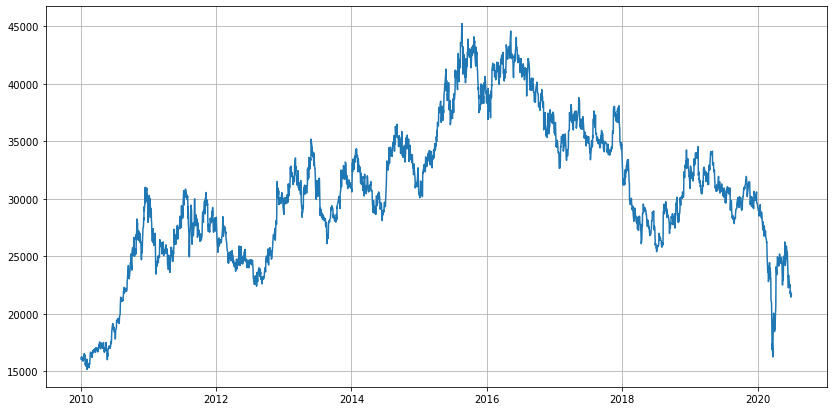

In [ ]:
plt.figure(figsize = (14, 7))
plt.plot(gl['Close'])
plt.grid()
plt.show()
# 2020년 들어서면서 코로나 때문인지 주가가 급락한 것을 볼 수 있다

# 2. 종목 주가 예측 테스트

> ## 1) 예측 테스트를 위한 데이터셋

- 2010년 1월 1일 ~ 2019년 12월 31일

In [ ]:
gl_Trunc = gl[:'2019-12-31']  
gl_Trunc.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-23,30100.0,29700.0,29900.0,29950.0,254298.0,29069.117188
2019-12-24,30300.0,29900.0,29900.0,30300.0,216787.0,29408.822266
2019-12-26,30650.0,30200.0,30500.0,30600.0,176187.0,29700.000000
2019-12-27,29800.0,29500.0,29750.0,29650.0,318395.0,29650.000000
2019-12-30,29800.0,29450.0,29800.0,29600.0,160145.0,29600.000000


> ## 2) 날짜(gl_Trunc.index)와 종가('Close')로 데이터프레임 생성

In [ ]:
df = pd.DataFrame({'ds' : gl_Trunc.index, 'y' : gl_Trunc['Close']})

df.reset_index(inplace = True)  # index 역할이었던 Date를 ds라는 열로 취급하자
 
del df['Date']

df.head()

,ds,y
0,2010-01-04,16200.0
1,2010-01-05,16000.0
2,2010-01-06,16150.0
3,2010-01-07,16250.0
4,2010-01-08,16250.0


> ## 3) fbprophet Package

- 페이스북에서 개발한 시계열 예측 패키지
- 경험적 규칙(Heuristic Rule)을 사용
   - Prophet 객체 생성 후 df를 .fit( )에 적용

In [ ]:
from fbprophet import Prophet
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


- 예측 날짜 구간 생성
   - 2020년 7월 1일까지 생성
   - periods = 184(6개월 예측)

In [ ]:
future = m.make_future_dataframe(periods = 184)

In [ ]:
future.tail()

,ds
2639,2020-06-27
2640,2020-06-28
2641,2020-06-29
2642,2020-06-30
2643,2020-07-01


- 생성된 예측 날짜 구간으로 예측 실행

In [ ]:
forecast = m.predict(future)

- 예측 결과 시각화
   - 산점도  : 원래값(y)
   - 실선 : 예측값(y_hat)

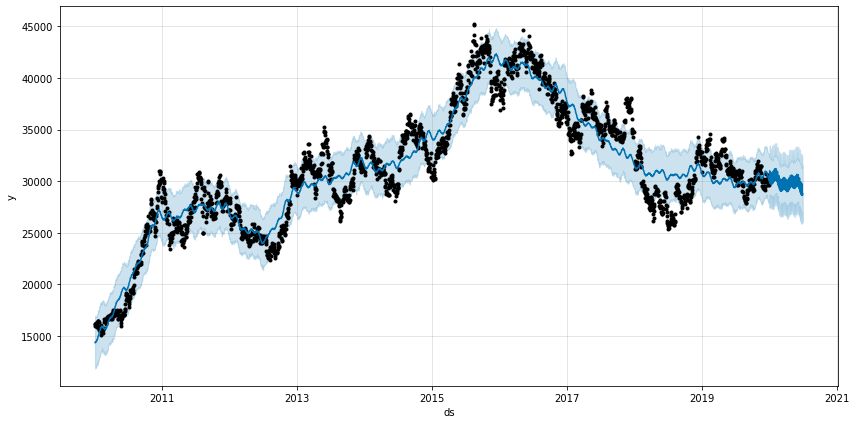

In [ ]:
m.plot(forecast, figsize = (12, 6));

- 선형회귀 및 weekly, yearly 성분별 시각화

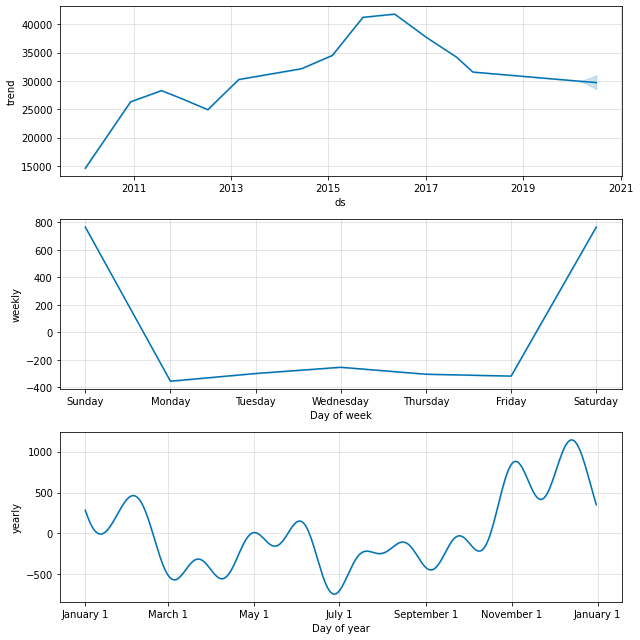

In [ ]:
m.plot_components(forecast);
# 추세
# 요일별
# 월별

> ## 4) 실제값(Real)과 예측값(Forecast) 비교 시각화

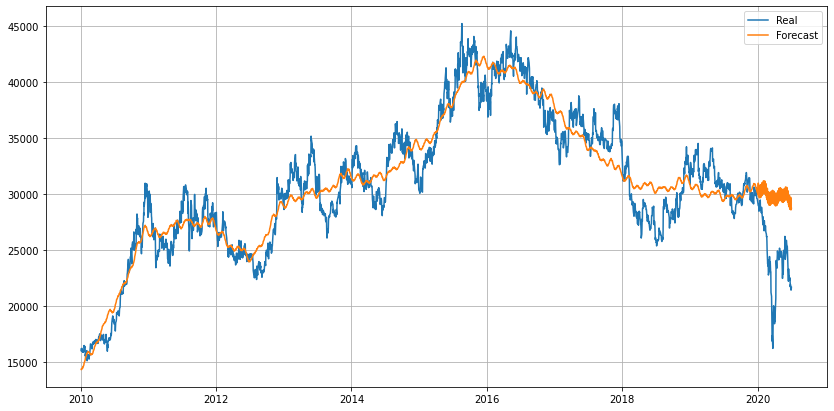

In [ ]:
plt.figure(figsize = (14, 7))
plt.plot(gl.index, gl['Close'], label = 'Real')
plt.plot(forecast['ds'], forecast['yhat'], label = 'Forecast')
plt.grid()
plt.legend()
plt.show()